In [ ]:
import torch
torch.__version__

#Seq2Seq model in Pytorch(Language Translation)



##Flow of Program
0. import impoortant libraries
1. prepare data
2. build a model
3. pick a loss function and optimizer
4. training and evaluation loop function
5. Starting Training loop
6. Visualize your model
7. Testing model with new sentence(Sentiment analysis)
8. Save your model

### **0. import important libraries**

In [ ]:
!pip install torchtext==0.15.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 600.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=14f9b0870951cbc7b71e1f4d9ed7420d454e9f498ff1cf315479a57eebc94ff4
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
ERROR: pip's dependency resolver does not currently take 

In [ ]:
!pip install torch  --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch
import torchtext # import the installed library

print(torch.__version__)
print(torchtext.__version__)

2.0.0+cu118
0.15.0+cpu


In [ ]:
!pip install datasets evaluate --upgrade

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import random
import spacy
import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://download.pytorch.org/whl/cu113
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
  Attempting uninstall: torchaudio
    Found exis

In [ ]:
import evaluate

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


###1. Prepare *data*

1. Loading your data
2. Tokenize data with spacy
3. Creating a vocab
4. Numericalizing our data
5. Converting data to tensors
6. creating data loaders(Batches)

####1.1 Loading yor data

In [ ]:
dataset=datasets.load_dataset("bentrevett/multi30k")

README.md:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/4.60M [00:00<?, ?B/s]

val.jsonl:   0%|          | 0.00/164k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/156k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/29000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1014 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['en', 'de'],
        num_rows: 29000
    })
    validation: Dataset({
        features: ['en', 'de'],
        num_rows: 1014
    })
    test: Dataset({
        features: ['en', 'de'],
        num_rows: 1000
    })
})

In [ ]:
train_data,valid_data,test_data=(dataset['train'],dataset['validation'],dataset['test'])

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de'],
     num_rows: 1014
 }))

In [ ]:
test_data[100],train_data[0]

({'en': 'A happy woman is preparing a refreshment at a coffee shop.',
  'de': 'Eine glückliche Frau bereitet in einem Coffee-Shop eine Erfrischung zu.'},
 {'en': 'Two young, White males are outside near many bushes.',
  'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.'})

####1.2 Tokenize data with  spacy

Two young, White males are outside near many bushes.<br>
[Two ,young, ,White ,males ,are ,outside ,near ,many ,bushes,.]

In [ ]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 87.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
en_nlp=spacy.load("en_core_web_sm")
de_nlp=spacy.load("de_core_news_sm")

In [ ]:
string="Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche."

In [ ]:
[token.text for token in de_nlp.tokenizer(string)]

['Zwei',
 'junge',
 'weiße',
 'Männer',
 'sind',
 'im',
 'Freien',
 'in',
 'der',
 'Nähe',
 'vieler',
 'Büsche',
 '.']

In [ ]:
def tokenize_example(example,en_nlp,de_nlp,max_length,lower,sos_token,eos_token):
  en_tokens=[token.text for token in en_nlp.tokenizer(example["en"])][:max_length]
  de_tokens=[token.text for token in de_nlp.tokenizer(example["de"])][:max_length]
  if lower:
    en_tokens=[token.lower() for token in en_tokens]
    de_tokens=[token.lower() for token in de_tokens]
  en_tokens=[sos_token]+en_tokens+[eos_token]
  de_tokens=[sos_token]+de_tokens+[eos_token]
  return {"en_token":en_tokens,"de_token":de_tokens}

In [ ]:
max_length=1000
lower=True
sos_token="<sos>"
eos_token="<eos>"
fn_kwargs={"en_nlp":en_nlp,
           "de_nlp":de_nlp,
           "max_length":max_length,
           "lower":lower,
           "sos_token":sos_token,
           "eos_token":eos_token}

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de'],
     num_rows: 1014
 }))

In [ ]:
train_data=train_data.map(tokenize_example,fn_kwargs=fn_kwargs)
valid_data=valid_data.map(tokenize_example,fn_kwargs=fn_kwargs)
test_data=test_data.map(tokenize_example,fn_kwargs=fn_kwargs)

Map:   0%|          | 0/29000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 1014
 }))

In [ ]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_token': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_token': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

####1.3 creating a vocab

In [ ]:
min_freq=2
unk_token="<unk>"
pad_token="<pad>"
special_token=[unk_token,pad_token,sos_token,eos_token]
en_vocab=torchtext.vocab.build_vocab_from_iterator(
    train_data["en_token"],
    min_freq=min_freq,
    specials=special_token
)
de_vocab=torchtext.vocab.build_vocab_from_iterator(
    train_data["de_token"],
    min_freq=min_freq,
    specials=special_token
)

In [ ]:
en_vocab.get_itos()[0:10],de_vocab.get_itos()[:10]

(['<unk>', '<pad>', '<sos>', '<eos>', 'a', '.', 'in', 'the', 'on', 'man'],
 ['<unk>', '<pad>', '<sos>', '<eos>', '.', 'ein', 'einem', 'in', 'eine', ','])

In [ ]:
len(en_vocab),len(de_vocab)

(5893, 7853)

In [ ]:
en_vocab.get_itos()[9]

'man'

In [ ]:
en_vocab.get_stoi()["man"],en_vocab["man"]

(9, 9)

In [ ]:
"The" in en_vocab

False

In [ ]:
en_vocab["<unk>"]

0

In [ ]:
#en_vocab["dkahjdhfnoiniofnv"] # for unknow word it is giving error we have to set <unk> as default to unknown code

In [ ]:
#setting the unknown word in vocab to <unk> token as 0 index
assert en_vocab[unk_token]==de_vocab[unk_token]
assert en_vocab[pad_token]==de_vocab[pad_token]
unk_index=en_vocab[unk_token]
pad_index=en_vocab[pad_token]

In [ ]:
unk_index,pad_index

(0, 1)

In [ ]:
#using set default index
en_vocab.set_default_index(unk_index)
de_vocab.set_default_index(unk_index)

In [ ]:
en_vocab["dkahjdhfnoiniofnv"] #now it is giving answer

0

In [ ]:
de_vocab["knkjbfeq"]

0

In [ ]:
en_vocab.get_itos()[0]

'<unk>'

In [ ]:
tokens=['i','love','watching','crime','snjkbshvvcv']
en_vocab.lookup_indices(tokens)

[956, 2169, 173, 0, 0]

In [ ]:
en_vocab.lookup_tokens([956, 2169, 173, 0, 0])

['i', 'love', 'watching', '<unk>', '<unk>']

####1.4 Numericalizing our data

In [ ]:
def numericalize_example(example,en_vocab,de_vocab,):
  en_ids=en_vocab.lookup_indices(example['en_token'])
  de_ids=de_vocab.lookup_indices(example['de_token'])
  return {"en_id":en_ids,"de_id":de_ids}

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token'],
     num_rows: 1014
 }))

In [ ]:
fn_kwargs={"en_vocab":en_vocab,"de_vocab":de_vocab}

In [ ]:
train_data=train_data.map(numericalize_example,fn_kwargs=fn_kwargs)
test_data=test_data.map(numericalize_example,fn_kwargs=fn_kwargs)
valid_data=valid_data.map(numericalize_example,fn_kwargs=fn_kwargs)

Map:   0%|          | 0/29000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 1014
 }))

In [ ]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_token': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_token': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>'],
 'en_id': [2, 16, 24, 15, 25, 778, 17, 57, 80, 202, 1312, 5, 3],
 'de_id': [2, 18, 26, 253, 30, 84, 20, 88, 7, 15, 110, 7647, 3171, 4, 3]}

###1.5 convert data to tensor

In [ ]:
train_data

Dataset({
    features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
    num_rows: 29000
})

In [ ]:
data_type='torch'
format_columns=['en_id','de_id']

In [ ]:
train_data=train_data.with_format(type=data_type,columns=format_columns,output_all_columns=True)
valid_data=valid_data.with_format(type=data_type,columns=format_columns,output_all_colums=True)
test_data=test_data.with_format(type=data_type,columns=format_columns,output_all_columns=True)

In [ ]:
train_data,test_data,valid_data

(Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 29000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 1000
 }),
 Dataset({
     features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
     num_rows: 1014
 }))

In [ ]:
train_data[0]

{'en_id': tensor([   2,   16,   24,   15,   25,  778,   17,   57,   80,  202, 1312,    5,
            3]),
 'de_id': tensor([   2,   18,   26,  253,   30,   84,   20,   88,    7,   15,  110, 7647,
         3171,    4,    3]),
 'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_token': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_token': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

In [ ]:
type(train_data[0]['en_id'])

torch.Tensor

####1.6 Create Data loaders(batch)

In [ ]:
batch_size=128

In [ ]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_en_ids=[example['en_id'] for example in batch]
    batch_de_ids=[example['de_id'] for example in batch]
    batch_en_ids=nn.utils.rnn.pad_sequence(batch_en_ids,padding_value=pad_index)
    batch_de_ids=nn.utils.rnn.pad_sequence(batch_de_ids,padding_value=pad_index)
    return{"batch_en_id":batch_en_ids,"batch_de_id":batch_de_ids}
  return collate_fn

In [ ]:
def get_data_loader(dataset,batch_size,pad_index,shuffle=False):
  collate_fn=get_collate_fn(pad_index)
  data_loader=torch.utils.data.DataLoader(
      dataset=dataset,
      batch_size=batch_size,
      collate_fn=collate_fn,
      shuffle=shuffle
  )
  return data_loader

In [ ]:
train_batch_loader=get_data_loader(train_data,batch_size,pad_index,shuffle=True)
valid_batch_loader=get_data_loader(valid_data,batch_size,pad_index)
test_batch_loader=get_data_loader(test_data,batch_size,pad_index)

In [ ]:
len(train_batch_loader),len(valid_batch_loader),len(test_batch_loader)

(227, 8, 8)

In [ ]:
train_data

Dataset({
    features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
    num_rows: 29000
})

In [ ]:
test_data

Dataset({
    features: ['en', 'de', 'en_token', 'de_token', 'en_id', 'de_id'],
    num_rows: 1000
})

###2. Build the Seq2Seq model

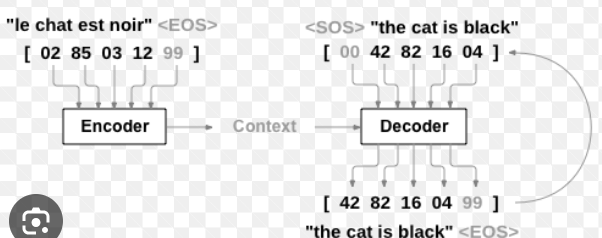

##### 2.1 Encoder

Single LSTM which unfolds in time



In [ ]:
class Encoder(nn.Module):
  def __init__(self,input_dim,embedding_dim,hidden_dim,n_layers,dropout):
    super().__init__()
    self.hidden_dim=hidden_dim
    self.n_layers=n_layers
    self.embedding=nn.Embedding(input_dim,embedding_dim)
    self.lstm=nn.LSTM(embedding_dim,hidden_dim,n_layers,dropout=dropout)
    self.dropout=nn.Dropout(dropout)


  def forward(self,src):
    #src ->[src_length,batch_size]   #src_length is different for each batch depending upon the max_length of sequence of that batch
    embedded=self.dropout(self.embedding(src))
    #embedded -> [src_length,batch_size,embedding_dim]
    outputs,(hidden,cell)=self.lstm(embedded)
    #outputs -> [src_length,batch_size,hidden_dim*n_direction]
    #hiddem -> [n_layers*n_directions,batch_size,hidden_dim]
    #cell -> [n_layers*n_directions,batch_size,hidden_dim]
    return hidden,cell

##### 2.2 Decoder

Single LSTM unfolds in time

In [ ]:
class Decoder(nn.Module):
  def __init__(self,output_dim,embedding_dim,hidden_dim,n_layers,dropout):
    super().__init__()
    self.output_dim=output_dim
    self.hidden_dim=hidden_dim
    self.n_layers=n_layers
    self.embedding=nn.Embedding(output_dim,embedding_dim)
    self.lstm=nn.LSTM(embedding_dim,hidden_dim,n_layers,dropout=dropout)
    self.fc_out=nn.Linear(hidden_dim,output_dim)
    self.dropout=nn.Dropout(dropout)

  def forward(self,input,hidden,cell):
    #input->[batch_size]
    #hiddem -> [n_layers*n_directions,batch_size,hidden_dim]
    #cell -> [n_layers*n_directions,batch_size,hidden_dim]
    input=input.unsqueeze(0)
    #input->[1,batch_size]
    embedded=self.dropout(self.embedding(input))
    #outputs -> [1,batch_size,embbeding_dim]
    outputs,(hidden,cell)=self.lstm(embedded,(hidden,cell))
    #outputs -> [1,batch_size,hidden_dim*n_direction]
    #hiddem -> [n_layers*n_directions,batch_size,hidden_dim]
    #cell -> [n_layers*n_directions,batch_size,hidden_dim]
    prediction=self.fc_out(outputs.squeeze(0))    #outputs -> [batch_size, output_dim]
    return prediction,hidden,cell

#####2.3 Seq2Seq Model

In [ ]:
class Seq2Seq(nn.Module):
  def __init__(self,encoder,decoder,device):
    super().__init__()
    self.encoder=encoder
    self.decoder=decoder
    self.device=device
    assert(
        encoder.hidden_dim == decoder.hidden_dim
    ),"Hidden Dimension of enocder and decoder must be same!!!"
    assert(
        encoder.n_layers == decoder.n_layers
    ),"Layers of encodr and decoder must be same"
  def forward(self,src,trg,teacher_forcing_ratio):
    #src=[src length,batch size] #src sentence
    #trg=[trg length,batch size] #trg sentence
    #teacher_forcing_ratio is probability to use teacher forcing
    #eg if teacher_forcing_ratio is 0.5 we use ground-truth inputs 50% of the time
    batch_size=trg.shape[1]
    trg_length=trg.shape[0]
    trg_vocab_size=self.decoder.output_dim
    #tensor to store decoder outputs
    outputs=torch.zeros(trg_length,batch_size,trg_vocab_size).to(self.device)
    hidden,cell=self.encoder(src)
    #hiddem -> [n_layers*n_directions,batch_size,hidden_dim]
    #cell -> [n_layers*n_directions,batch_size,hidden_dim]
    # first input to decoder is the <sos> tokens
    input=trg[0,:]
    # input[batch_size]
    for t in range(1,trg_length):
      # Insert input token embeddings , previous hidden state and previous cell states
      # Recieve output tensor (predictions) and new hidden and cell states
      output, hidden, cell = self.decoder(input, hidden, cell)
      #output = [batch_size,output_dim]
      #hiddem -> [n_layers*n_directions,batch_size,hidden_dim]
      #cell -> [n_layers*n_directions,batch_size,hidden_dim]
      #place predictions in a tensor holding predictions for each token
      outputs[t]=output
      #decide if we are going to use teacher forcing or not
      teacher_force=random.random()<teacher_forcing_ratio
      #get the highest prediction token as next input
      top1=output.argmax(1)
      # if techer_forcing, use actual next token as next input
      # if not use predicted token as next input
      input=trg[t] if teacher_force else top1
    return outputs

In [ ]:
input_dim=len(de_vocab)
output_dim=len(en_vocab)
encoder_embedding_dim=256
decoder_embedding_dim=256
hidden_dim=512
n_layers=2
encoder_dropout=0.5
decoder_dropout=0.5
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder=Encoder(input_dim,encoder_embedding_dim,hidden_dim,n_layers,encoder_dropout)
decoder=Decoder(output_dim,decoder_embedding_dim,hidden_dim,n_layers,decoder_dropout)
model=Seq2Seq(encoder,decoder,device).to(device)

#### Weight initialization

Uniform Distribution(-0.08 +0.08)

In [ ]:
def init_weights(m):
  for name,param in m.named_parameters():
    nn.init.uniform(param.data,-0.08,0.08)

model.apply(init_weights)

<ipython-input-64-ef05c4ed2f45>:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(param.data,-0.08,0.08)


Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7853, 256)
    (lstm): LSTM(256, 512, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (lstm): LSTM(256, 512, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 13,898,501 trainable parameters


###3. Pick a loss function and optimizer

In [ ]:
learning_rate=0.001

In [ ]:
optimizer=optim.Adam(model.parameters())
criterion=nn.CrossEntropyLoss(ignore_index=pad_index)

###4. Training and Evaluating Function

In [ ]:
def train_fun(model,data_loader,optimizer,criterion,clip,teacher_forcing_ratio,device):
  model.train()
  epoch_loss=0.0
  for i,batch in enumerate(data_loader):
    src=batch['batch_de_id'].to(device)
    #src=[src length,batch_size]
    trg=batch['batch_en_id'].to(device)
    #trg=[trg length,batch_size]
    optimizer.zero_grad()
    output=model(src,trg,teacher_forcing_ratio)
    # output = [trg_length,batch_size,trg_vocab_size]
    output_dim=output.shape[-1]
    # output_dim =[trg_vocab_size]
    output=output[1:].view(-1,output_dim)
    # output =[(trg_length-1) * batch_size, trg_vocab_size]
    trg=trg[1:].view(-1)
    # trg =[(trg_length-1) * batch_size]
    loss=criterion(output,trg)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(),clip)
    optimizer.step()
    epoch_loss+=loss.item()
  return epoch_loss/len(data_loader)

Evaluate Function

In [ ]:
def evaluate_fn(model,data_loader,criterion,device):
  model.eval()
  epoch_loss=0.0
  with torch.no_grad():
    for i,batch in enumerate(data_loader):
      src=batch["batch_de_id"].to(device)
      trg=batch["batch_en_id"].to(device)
      output=model(src,trg,0)
      output_dim=output.shape[-1]
      output=output[1:].view(-1,output_dim)
      trg=trg[1:].view(-1)
      loss=criterion(output,trg)
      epoch_loss+=loss.item()
    return epoch_loss/len(data_loader)

###5. Start Training loop/save the model

In [ ]:
n_epochs=10
clip=1.0
teacher_forcing_ratio=0.5
best_valid_loss=float("inf")
for epoch in tqdm.tqdm(range(n_epochs)):
  train_loss=train_fun(model,train_batch_loader,optimizer,criterion,clip,teacher_forcing_ratio,device)
  valid_loss=evaluate_fn(model,test_batch_loader,criterion,device)
  if valid_loss < best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),'./seq2seq_model.pt')
  print(f"\t Train Loss:{train_loss:7.3f} | Train PPL:{np.exp(train_loss):7.3f}")
  print(f"\t Valid Loss:{valid_loss:7.3f} | Valid PPL:{np.exp(valid_loss):7.3f}")

 10%|█         | 1/10 [00:51<07:41, 51.27s/it]

	 Train Loss:  4.197 | Train PPL: 66.505
	 Valid Loss:  4.664 | Valid PPL:106.108


 20%|██        | 2/10 [01:37<06:28, 48.56s/it]

	 Train Loss:  4.021 | Train PPL: 55.737
	 Valid Loss:  4.458 | Valid PPL: 86.291


 30%|███       | 3/10 [02:26<05:39, 48.52s/it]

	 Train Loss:  3.853 | Train PPL: 47.125
	 Valid Loss:  4.338 | Valid PPL: 76.572


 40%|████      | 4/10 [03:13<04:48, 48.02s/it]

	 Train Loss:  3.682 | Train PPL: 39.728
	 Valid Loss:  4.284 | Valid PPL: 72.517


 50%|█████     | 5/10 [04:00<03:58, 47.62s/it]

	 Train Loss:  3.566 | Train PPL: 35.362
	 Valid Loss:  4.155 | Valid PPL: 63.735


 60%|██████    | 6/10 [04:47<03:10, 47.54s/it]

	 Train Loss:  3.434 | Train PPL: 31.013
	 Valid Loss:  4.052 | Valid PPL: 57.517


 70%|███████   | 7/10 [05:36<02:23, 47.74s/it]

	 Train Loss:  3.291 | Train PPL: 26.860
	 Valid Loss:  3.963 | Valid PPL: 52.625


 80%|████████  | 8/10 [06:24<01:35, 47.90s/it]

	 Train Loss:  3.155 | Train PPL: 23.461
	 Valid Loss:  3.858 | Valid PPL: 47.374


 90%|█████████ | 9/10 [07:12<00:48, 48.10s/it]

	 Train Loss:  2.996 | Train PPL: 20.000
	 Valid Loss:  3.878 | Valid PPL: 48.321


100%|██████████| 10/10 [08:01<00:00, 48.12s/it]

	 Train Loss:  2.911 | Train PPL: 18.371
	 Valid Loss:  3.888 | Valid PPL: 48.800


###7. Testing model with Test sentences

In [ ]:
model.load_state_dict(torch.load("seq2seq_model.pt"))
test_loss = evaluate_fn(model,test_batch_loader,criterion,device)
print(f"Test Loss:{test_loss:.3f} | Test PPL:{np.exp(test_loss):7.3f}")

Test Loss:3.858 | Test PPL: 47.374


###Blue Score for showing model performance

In [ ]:
def translate_sentence(
    sentence,
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
    max_output_length=25,
):
    model.eval()
    with torch.no_grad():
        if isinstance(sentence, str):
            tokens = [token.text for token in de_nlp.tokenizer(sentence)]
        else:
            tokens = [token for token in sentence]
        if lower:
            tokens = [token.lower() for token in tokens]
        tokens = [sos_token] + tokens + [eos_token]
        ids = de_vocab.lookup_indices(tokens)
        tensor = torch.LongTensor(ids).unsqueeze(-1).to(device)
        hidden, cell = model.encoder(tensor)
        inputs = en_vocab.lookup_indices([sos_token])
        for _ in range(max_output_length):
            inputs_tensor = torch.LongTensor([inputs[-1]]).to(device)
            output, hidden, cell = model.decoder(inputs_tensor, hidden, cell)
            predicted_token = output.argmax(-1).item()
            inputs.append(predicted_token)
            if predicted_token == en_vocab[eos_token]:
                break
        tokens = en_vocab.lookup_tokens(inputs)
    return tokens

In [ ]:
sentence = test_data[0]["de"]
expected_translation = test_data[0]["en"]
sentence,expected_translation

('Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.',
 'A man in an orange hat starring at something.')

In [ ]:
sentence = "Leute Reparieren das Dach eines Hauses."

In [ ]:
translation = translate_sentence(
    sentence,
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

In [ ]:
translation

['<sos>', 'people', 'are', 'walking', 'a', 'a', 'a', 'a', '.', '<eos>']

In [ ]:
translations = [
    translate_sentence(
        example["de"],
        model,
        en_nlp,
        de_nlp,
        en_vocab,
        de_vocab,
        lower,
        sos_token,
        eos_token,
        device,
    )
    for example in tqdm.tqdm(test_data)
]

100%|██████████| 1000/1000 [00:09<00:00, 102.01it/s]


In [ ]:
bleu = evaluate.load("bleu")

In [ ]:
predictions = [" ".join(translation[1:-1]) for translation in translations]

references = [[example["en"]] for example in test_data]

In [ ]:
predictions[0], references[0]


('a man in a black jacket is a . .',
 ['A man in an orange hat starring at something.'])

In [ ]:

def get_tokenizer_fn(nlp, lower):
    def tokenizer_fn(s):
        tokens = [token.text for token in nlp.tokenizer(s)]
        if lower:
            tokens = [token.lower() for token in tokens]
        return tokens

    return tokenizer_fn

In [ ]:
tokenizer_fn = get_tokenizer_fn(en_nlp, lower)

In [ ]:
tokenizer_fn(predictions[0]), tokenizer_fn(references[0][0])


(['a', 'man', 'in', 'a', 'black', 'jacket', 'is', 'a', '.', '.'],
 ['a', 'man', 'in', 'an', 'orange', 'hat', 'starring', 'at', 'something', '.'])

In [ ]:
results = bleu.compute(
    predictions=predictions, references=references, tokenizer=tokenizer_fn
)

In [ ]:
results

{'bleu': 0.12146214011402653,
 'precisions': [0.4639661233620965,
  0.17375824939215007,
  0.08168505135032332,
  0.03930222782681799],
 'brevity_penalty': 0.9576196832759178,
 'length_ratio': 0.9584928779292388,
 'translation_length': 12516,
 'reference_length': 13058}